In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from pytorch_tabnet.tab_model import TabNetClassifier
import numpy as np
import torch

# Load CSV
df = pd.read_csv("crop_disease_characteristics.csv")

# Encode labels (Yes = 1, No = 0)
df = df.fillna("No")
df_encoded = df.copy()
for col in df.columns[1:]:
    df_encoded[col] = df[col].map({'Yes': 1, 'No': 0})

# Target: assume if any symptom is present → disease present
df_encoded["target"] = df_encoded.iloc[:, 1:].max(axis=1)

X = df_encoded.iloc[:, 1:-1].values
y = df_encoded["target"].values

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# TabNet
clf = TabNetClassifier()

clf.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric=['accuracy'],
    max_epochs=100,
    patience=10,
    batch_size=32,
    virtual_batch_size=16,
    num_workers=0,
)

clf.save_model("tabnet_disease_model")


c:\Users\moham\Agrithon\venv\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.00067 | val_0_accuracy: 1.0     |  0:00:00s
epoch 1  | loss: 0.00057 | val_0_accuracy: 1.0     |  0:00:00s
epoch 2  | loss: 0.00052 | val_0_accuracy: 1.0     |  0:00:00s
epoch 3  | loss: 0.00047 | val_0_accuracy: 1.0     |  0:00:00s
epoch 4  | loss: 0.00043 | val_0_accuracy: 1.0     |  0:00:00s
epoch 5  | loss: 0.0003  | val_0_accuracy: 1.0     |  0:00:00s
epoch 6  | loss: 0.00024 | val_0_accuracy: 1.0     |  0:00:00s
epoch 7  | loss: 0.00026 | val_0_accuracy: 1.0     |  0:00:00s
epoch 8  | loss: 0.00023 | val_0_accuracy: 1.0     |  0:00:00s
epoch 9  | loss: 0.00026 | val_0_accuracy: 1.0     |  0:00:00s
epoch 10 | loss: 0.00031 | val_0_accuracy: 1.0     |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_accuracy = 1.0
Successfully saved model at tabnet_disease_model.zip


c:\Users\moham\Agrithon\venv\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


'tabnet_disease_model.zip'

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from pytorch_tabnet.tab_model import TabNetClassifier
import numpy as np
import torch

# Load CSV
df = pd.read_csv("crop_insect_characteristics.csv")

# Encode labels (Yes = 1, No = 0)
df = df.fillna("No")
df_encoded = df.copy()
for col in df.columns[1:]:
    df_encoded[col] = df[col].map({'Yes': 1, 'No': 0})

# Target: assume if any symptom is present → insect present
df_encoded["target"] = df_encoded.iloc[:, 1:].max(axis=1)

X = df_encoded.iloc[:, 1:-1].values
y = df_encoded["target"].values

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# TabNet
clf = TabNetClassifier()

clf.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric=['accuracy'],
    max_epochs=100,
    patience=10,
    batch_size=32,
    virtual_batch_size=16,
    num_workers=0,
)

clf.save_model("tabnet_insect_model")


c:\Users\moham\Agrithon\venv\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.00059 | val_0_accuracy: 1.0     |  0:00:00s
epoch 1  | loss: 0.00056 | val_0_accuracy: 1.0     |  0:00:00s
epoch 2  | loss: 0.00053 | val_0_accuracy: 1.0     |  0:00:00s
epoch 3  | loss: 0.00048 | val_0_accuracy: 1.0     |  0:00:00s
epoch 4  | loss: 0.00043 | val_0_accuracy: 1.0     |  0:00:00s
epoch 5  | loss: 0.00047 | val_0_accuracy: 1.0     |  0:00:00s
epoch 6  | loss: 0.00052 | val_0_accuracy: 1.0     |  0:00:00s
epoch 7  | loss: 0.00047 | val_0_accuracy: 1.0     |  0:00:00s
epoch 8  | loss: 0.00041 | val_0_accuracy: 1.0     |  0:00:00s
epoch 9  | loss: 0.00048 | val_0_accuracy: 1.0     |  0:00:00s
epoch 10 | loss: 0.00041 | val_0_accuracy: 1.0     |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_accuracy = 1.0
Successfully saved model at tabnet_insect_model.zip


c:\Users\moham\Agrithon\venv\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


'tabnet_insect_model.zip'

In [3]:
from pytorch_tabnet.tab_model import TabNetClassifier
import pandas as pd
import numpy as np

model = TabNetClassifier()
model.load_model("tabnet_disease_model.zip")

# Load some test CSV
df = pd.read_csv("crop_disease_characteristics.csv")
df_test = df.copy()
for col in df.columns[1:]:
    df_test[col] = df[col].map({'Yes': 1, 'No': 0})

X_test = df_test.iloc[:, 1:].values
preds = model.predict(X_test)

# 1 = Disease Present, 0 = Not Present
df_test["prediction"] = preds
print(df_test[["Image", "prediction"]])


            Image  prediction
0    disease1.jpg           1
1   disease10.jpg           1
2   disease11.jpg           1
3   disease12.jpg           1
4   disease13.jpg           1
5   disease14.jpg           1
6   disease15.jpg           1
7   disease16.jpg           1
8   disease17.jpg           1
9   disease18.jpg           1
10  disease19.jpg           1
11   disease2.jpg           1
12  disease20.jpg           1
13  disease21.jpg           1
14  disease22.jpg           1
15  disease23.jpg           1
16  disease24.jpg           1
17  disease25.jpg           1
18  disease26.jpg           1
19  disease27.jpg           1
20  disease28.jpg           1
21  disease29.jpg           1
22   disease3.jpg           1
23  disease30.jpg           1
24  disease31.jpg           1
25  disease32.jpg           1
26  disease33.jpg           1
27  disease34.jpg           1
28  disease35.jpg           1
29  disease36.jpg           1
30  disease37.jpg           1
31  disease38.jpg           1
32  diseas

c:\Users\moham\Agrithon\venv\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [4]:
from pytorch_tabnet.tab_model import TabNetClassifier
import pandas as pd
import numpy as np

model = TabNetClassifier()
model.load_model("tabnet_insect_model.zip")

# Load some test CSV
df = pd.read_csv("crop_insect_characteristics.csv")
df_test = df.copy()
for col in df.columns[1:]:
    df_test[col] = df[col].map({'Yes': 1, 'No': 0})

X_test = df_test.iloc[:, 1:].values
preds = model.predict(X_test)

# 1 = Disease Present, 0 = Not Present
df_test["prediction"] = preds
print(df_test[["Image", "prediction"]])


           Image  prediction
0    insect1.jpg           1
1   insect10.jpg           1
2   insect11.jpg           1
3   insect12.jpg           1
4   insect13.jpg           1
5   insect14.jpg           1
6   insect15.jpg           1
7   insect16.jpg           1
8   insect17.jpg           1
9   insect18.jpg           1
10  insect19.jpg           1
11   insect2.jpg           1
12  insect20.jpg           1
13  insect21.jpg           1
14  insect22.jpg           1
15  insect23.jpg           1
16  insect24.jpg           1
17  insect25.jpg           1
18  insect26.jpg           1
19  insect27.jpg           1
20  insect28.jpg           1
21  insect29.jpg           1
22   insect3.jpg           1
23  insect30.jpg           1
24  insect31.jpg           1
25  insect32.jpg           1
26  insect33.jpg           1
27  insect34.jpg           1
28  insect35.jpg           1
29  insect36.jpg           1
30  insect37.jpg           1
31  insect38.jpg           1
32  insect39.jpg           1
33   insect4.j

c:\Users\moham\Agrithon\venv\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


c:\Users\moham\Agrithon\venv\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
c:\Users\moham\Agrithon\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128247 (\N{CAMERA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


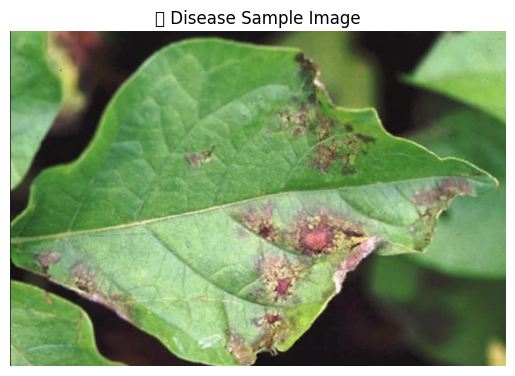

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt
import cv2

# === Load model ===
tabnet_model = TabNetClassifier()
tabnet_model.load_model("tabnet_disease_model.zip")

# === Symptom Questions ===
questions = [
    "Do you see brown patches on the leaf?",
    "Is there a yellow halo around the spots?",
    "Are the leaf edges turning black?",
    "Is the infection spreading across the leaf surface?",
    "Do the leaves look wilted or dry?"
]

# === Image path ===
image_path = "Crop Disease.png"  # CHANGE THIS

# === Load image ===
def show_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    plt.title("📷 Disease Sample Image")
    plt.show()

# === UI toggles ===
toggles = [
    widgets.ToggleButtons(
        options=["Yes", "No"],
        description=q,
        value=None,
        style={"description_width": "initial"},
        layout=widgets.Layout(width='100%')
    ) for q in questions
]

submit_btn = widgets.Button(description="🧪 Predict Disease", button_style='success')
output = widgets.Output()

# === Prediction ===
def predict_tabnet_from_user_input(button):
    output.clear_output()
    with output:
        if any(toggle.value is None for toggle in toggles):
            print("⚠️ Please answer all questions.")
            return
        user_input = [1 if toggle.value == "Yes" else 0 for toggle in toggles]
        X = np.array(user_input).reshape(1, -1)
        prediction = tabnet_model.predict(X)[0]
        if prediction == 1:
            print("🌿 Disease Detected ✅")
        else:
            print("✅ Leaf Looks Healthy 🚫")

submit_btn.on_click(predict_tabnet_from_user_input)

# === Display everything ===
show_image(image_path)
display(widgets.VBox(toggles + [submit_btn, output]))


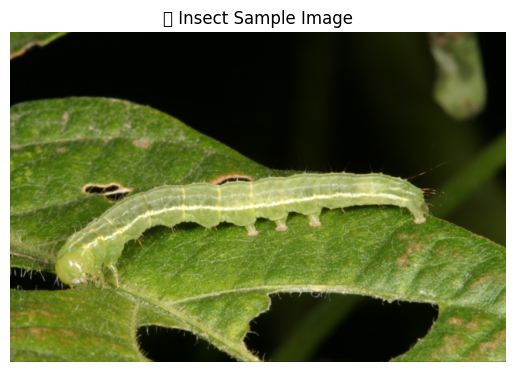

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt
import cv2

# === Load model ===
tabnet_model = TabNetClassifier()
tabnet_model.load_model("tabnet_insect_model.zip")

# === Symptom Questions ===
questions = [
    "Do you see a green color larva on the crop leaf?",
    "Is there any hole in the leaf surface?",
    "Are the leaves rolled or twisted?",
    "Do you see sticky substances on the leaf?",
    "Are there any dark spots or patches on the leaf?"
]

# === Image path ===
image_path = "Insect.jpg"  # CHANGE THIS

# === Load image ===
def show_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    plt.title("📷 Insect Sample Image")
    plt.show()

# === UI toggles ===
toggles = [
    widgets.ToggleButtons(
        options=["Yes", "No"],
        description=q,
        value=None,
        style={"description_width": "initial"},
        layout=widgets.Layout(width='100%')
    ) for q in questions
]

submit_btn = widgets.Button(description="🧪 Detect Insect", button_style='success')
output = widgets.Output()

# === Prediction ===
def predict_tabnet_from_user_input(button):
    output.clear_output()
    with output:
        if any(toggle.value is None for toggle in toggles):
            print("⚠️ Please answer all questions.")
            return
        user_input = [1 if toggle.value == "Yes" else 0 for toggle in toggles]
        X = np.array(user_input).reshape(1, -1)
        prediction = tabnet_model.predict(X)[0]
        if prediction == 1:
            print("🌿 Insect Detected ✅")
        else:
            print("✅ Leaf Looks Healthy 🚫")

submit_btn.on_click(predict_tabnet_from_user_input)

# === Display everything ===
show_image(image_path)
display(widgets.VBox(toggles + [submit_btn, output]))
